<a href="https://colab.research.google.com/github/AzkaHasan/diabetes_dataset_R-/blob/main/DiabetesR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Install R in Google Colab
!sudo apt-get install -y r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [20]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


'data.frame':	442 obs. of  11 variables:
 $ age   : num  0.03808 -0.00188 0.0853 -0.08906 0.00538 ...
 $ sex   : num  0.0507 -0.0446 0.0507 -0.0446 -0.0446 ...
 $ bmi   : num  0.0617 -0.0515 0.0445 -0.0116 -0.0364 ...
 $ bp    : num  0.02187 -0.02633 -0.00567 -0.03666 0.02187 ...
 $ s1    : num  -0.04422 -0.00845 -0.0456 0.01219 0.00393 ...
 $ s2    : num  -0.0348 -0.0192 -0.0342 0.025 0.0156 ...
 $ s3    : num  -0.0434 0.07441 -0.03236 -0.03604 0.00814 ...
 $ s4    : num  -0.00259 -0.03949 -0.00259 0.03431 -0.00259 ...
 $ s5    : num  0.01991 -0.06833 0.00286 0.02269 -0.03199 ...
 $ s6    : num  -0.01765 -0.0922 -0.02593 -0.00936 -0.04664 ...
 $ target: num  1 0 1 1 0 0 0 0 0 1 ...
[1] "Accuracy: 0.738636363636364"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmpGefH2U/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/caTools_1.18.3.tar.gz'
Content type 'application/x-gzip' length 65825 bytes (64 KB)
downloaded 64 KB


The downloaded source packages are in
	‘/tmp/RtmpGefH2U/downloaded_packages’


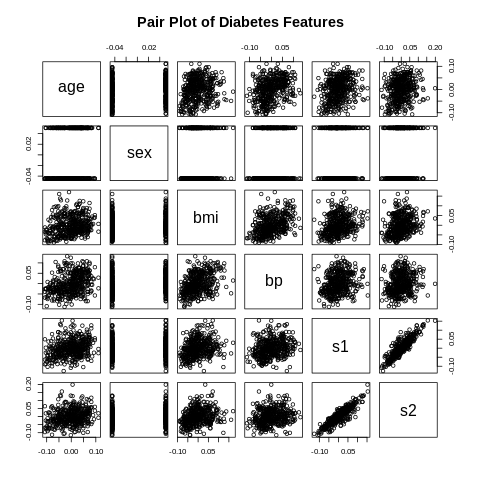

In [21]:
%%R
# Install needed libraries
install.packages("tidyverse")
install.packages("caTools")

# Load libraries
library(tidyverse)
library(caTools)

# Load dataset (upload your diabetes.csv to Colab first)
data <- read.csv("diabetes_dataset.csv")

# Convert 'target' to a binary variable (0 or 1) based on the median
median_target <- median(data$target)
data$target <- ifelse(data$target > median_target, 1, 0)


# Show first few rows
head(data)

# Check structure
str(data)

# Summary statistics
summary(data)

# Correlation plot (quick check)
pairs(data[,1:6], main="Pair Plot of Diabetes Features")

# Split into train/test
set.seed(123)
split <- sample.split(data$target, SplitRatio=0.8)
train <- subset(data, split==TRUE)
test <- subset(data, split==FALSE)

# Logistic Regression Model
model <- glm(target ~ ., data=train, family=binomial)

# Summary of model
summary(model)

# Predictions
pred <- predict(model, newdata=test, type="response")
pred_class <- ifelse(pred > 0.5, 1, 0)

# Accuracy
accuracy <- mean(pred_class == test$target)
print(paste("Accuracy:", accuracy))

In [22]:
%%R
# Install and load required libraries
install.packages("MASS")        # for the diabetes dataset
install.packages("GGally")      # for pair plots
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/MASS_7.3-65.tar.gz'
Content type 'application/x-gzip' length 510322 bytes (498 KB)
downloaded 498 KB


The downloaded source packages are in
	‘/tmp/RtmpGefH2U/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/GGally_2.3.0.tar.gz'
Content type 'application/x-gzip' length 1365121 bytes (1.3 MB)
downloaded 1.3 MB


The downloaded source packages are in
	‘/tmp/RtmpGefH2U/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/RtmpGefH2U/downloaded_packages’


In [8]:
%%R
library(MASS)
library(GGally)
library(ggplot2)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



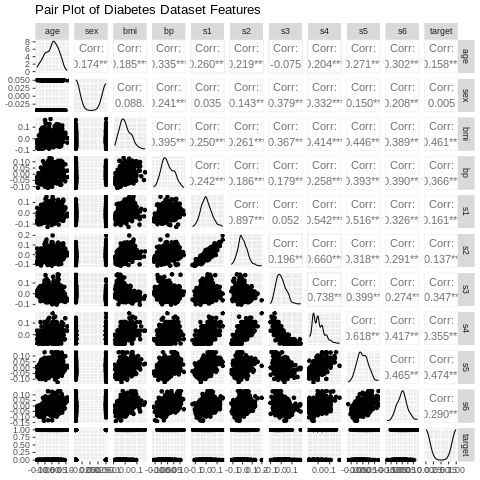

In [14]:
%%R
# Work with the loaded data object (from diabetes_dataset.csv)
# Inspect first few rows
head(data)

# Create pair plot for all features
ggpairs(data,
        title = "Pair Plot of Diabetes Dataset Features",
        progress = FALSE)

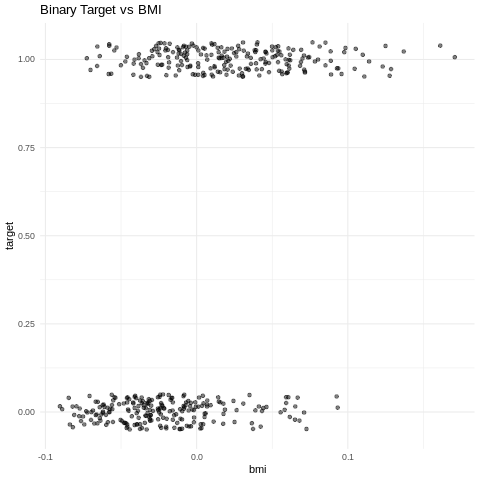

In [16]:
%%R
# Work with the loaded data object (from diabetes_dataset.csv)
# Simple visualization: binary target vs. bmi
ggplot(data, aes(x=bmi, y=target)) +
  geom_point(position=position_jitter(height=0.05), alpha=0.5) +
  labs(title="Binary Target vs BMI",
       xlab="BMI", ylab="Binary Target") +
  theme_minimal()

In [18]:
%%R
# Multiple logistic regression: target ~ bmi + bp + s5
model2 <- glm(target ~ bmi + bp + s5, data=data, family=binomial)
summary(model2)


Call:
glm(formula = target ~ bmi + bp + s5, family = binomial, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.03358    0.11621   0.289  0.77263    
bmi         16.30652    3.07314   5.306 1.12e-07 ***
bp           8.22386    2.73443   3.008  0.00263 ** 
s5          17.22949    3.06646   5.619 1.92e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 612.74  on 441  degrees of freedom
Residual deviance: 448.52  on 438  degrees of freedom
AIC: 456.52

Number of Fisher Scoring iterations: 4



In [24]:
%%R
# Show first few rows
head(data)

# Get number of rows
nrow(data)

# Get number of columns
ncol(data)

# Get both rows and columns at once
dim(data)

# Get column names
colnames(data)

# Get structure of data
str(data)

# Get summary statistics
summary(data)

'data.frame':	442 obs. of  11 variables:
 $ age   : num  0.03808 -0.00188 0.0853 -0.08906 0.00538 ...
 $ sex   : num  0.0507 -0.0446 0.0507 -0.0446 -0.0446 ...
 $ bmi   : num  0.0617 -0.0515 0.0445 -0.0116 -0.0364 ...
 $ bp    : num  0.02187 -0.02633 -0.00567 -0.03666 0.02187 ...
 $ s1    : num  -0.04422 -0.00845 -0.0456 0.01219 0.00393 ...
 $ s2    : num  -0.0348 -0.0192 -0.0342 0.025 0.0156 ...
 $ s3    : num  -0.0434 0.07441 -0.03236 -0.03604 0.00814 ...
 $ s4    : num  -0.00259 -0.03949 -0.00259 0.03431 -0.00259 ...
 $ s5    : num  0.01991 -0.06833 0.00286 0.02269 -0.03199 ...
 $ s6    : num  -0.01765 -0.0922 -0.02593 -0.00936 -0.04664 ...
 $ target: num  1 0 1 1 0 0 0 0 0 1 ...
      age                 sex                bmi                  bp          
 Min.   :-0.107226   Min.   :-0.04464   Min.   :-0.090275   Min.   :-0.11240  
 1st Qu.:-0.037299   1st Qu.:-0.04464   1st Qu.:-0.034229   1st Qu.:-0.03666  
 Median : 0.005383   Median :-0.04464   Median :-0.007284   Median :-0.

In [25]:
%%R

nrow(data)

[1] 442


In [26]:
%%R

ncol(data)

[1] 11
